In [3]:
import numpy as np
import pandas as pd

In [4]:
players = pd.read_csv("players_22.csv")
players.head()

<ipython-input-4-3f6784df37dd>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
features = ["overall", "potential", "value_eur", "wage_eur", "age"]

In [6]:
players = players.dropna(subset=features)

In [7]:
data = players[features].copy()

In [8]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30


# Steps for Kmeans Clustering
1. Scale the data
2. Initialize random Centroids
3. Label each data point based on the nearest centroid
4. update centroids
5. Repeat step 3 and 4 until centroids stop changing

In [9]:
# Scaling the Data
data = (data - data.min()) / (data.max() - data.min()) *9 + 1
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [10]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [12]:
# Initialize random Centroids
def random_centroids(data, k):
  centroids=[]
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [13]:
centroids = random_centroids(data, 4)

<ipython-input-12-fe656ff7adbb>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [14]:
centroids

,0,1,2,3
overall,5.304348,4.326087,5.108696,2.369565
potential,6.869565,3.739130,6.282609,5.891304
value_eur,1.044817,1.034378,1.005150,1.021620
wage_eur,1.000000,1.218884,1.553648,1.001288
age,3.000000,3.333333,3.666667,4.666667


In [15]:
# Label each data point based on the nearest centroid
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [16]:
labels = get_labels(data, centroids)

In [17]:
labels

,0
0,2
1,2
2,2
3,2
4,2
...,...
19234,1
19235,1
19236,1
19237,1


In [18]:
labels.value_counts()

,count
1,7580
2,7417
0,3347
3,821


In [19]:
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [21]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
data_2d

array([[ 7.93732434,  4.59831717],
       [ 7.27550529,  4.826905  ],
       [ 7.74806061,  3.45005802],
       ...,
       [-4.12956891, -2.71891484],
       [-4.38374414, -1.63668971],
       [-4.38374414, -1.63668971]])

In [22]:
centroids_2d = pca.fit_transform(centroids)
centroids_2d

array([[ 2.24929459, -1.91579839],
       [ 5.28942559,  0.542148  ],
       [-4.32205144,  0.0386021 ],
       [-4.00033283, -0.11750724],
       [ 0.78366409,  1.45255553]])

In [23]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.fit_transform(centroids)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

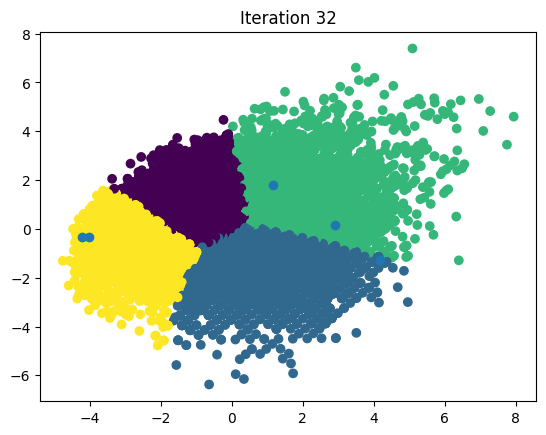

In [24]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [25]:
centroids

,0,1,2,3
overall,4.308463,4.651326,6.407184,2.581217
potential,5.836061,4.377841,6.520606,4.273632
value_eur,1.062697,1.035761,1.371856,1.013417
wage_eur,1.074077,1.089579,1.615210,1.017245
age,2.701158,5.439415,4.431376,2.485968


In [26]:
labels.value_counts()

,count
1,6369
0,5677
2,4174
3,2945


In [42]:
players[labels == 3][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
11593,Raphael Doninho,64,64,700000.0,5000.0,21
12250,D. Ferdiz,63,63,500000.0,500.0,21
12643,B. Miranda,63,65,625000.0,500.0,23
12871,M. Collao,63,65,625000.0,900.0,23
13552,S. Matthews,62,66,575000.0,2000.0,24
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


# Cluster Evaluation

0 - Rising Stars

1 - Steady performers

2 - Elite Veterans

3 - High-Value Youth

# Sklearn Implementation

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [30]:
Centroids = kmeans.cluster_centers_

In [31]:
Labels = kmeans.labels_

In [32]:
Labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [33]:
pd.DataFrame(Centroids, columns=features).T

,0,1,2,3
overall,6.079891,5.606894,3.446198,4.238920
potential,6.717689,5.231098,5.298951,4.222409
value_eur,1.428530,1.090455,1.033079,1.032020
wage_eur,1.627279,1.271083,1.035421,1.056845
age,3.696247,6.184439,2.468254,4.678550


In [34]:
players[Labels == 0][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
10896,Pacheco,65,81,1800000.0,5000.0,20
10908,Milson,65,80,1800000.0,2000.0,21
10965,F. Orozco,65,84,1800000.0,3000.0,19
11012,Y. Kallon,65,82,1900000.0,4000.0,20
